In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset and look at the first 5 elements to get an overview of the dataset
url = 'data.csv' 
df = pd.read_csv(url, sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
#Check if the dataset contains empty values. Since it doesn't, there is no need to fill it up with dummy values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#Check for the data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Since the Date is an object type, we had to convert it to numerical values (ordinal format) to be able to use it in a regression model

In [6]:
# Convert the 'Date' column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

In [7]:
# Set the dependant (y) and independant variables (X)
X = df['Date'].values.reshape(-1, 1) #Had to reshape as it is only one column with many values
y = df['Close'].values

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [10]:
# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_poly_test)

In [12]:
# Calculate the R² score to evaluate accuracy
r2 = r2_score(y_test, y_pred)

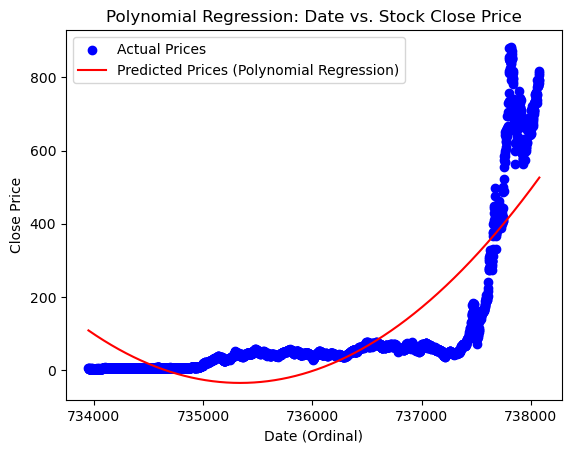

R² Score: 0.67


In [13]:
# Plot the results
plt.scatter(df['Date'], y, color='blue', label='Actual Prices')
plt.plot(df['Date'], model.predict(poly.transform(X)), color='red', label='Predicted Prices (Polynomial Regression)')
plt.title('Polynomial Regression: Date vs. Stock Close Price')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print R² score
print(f'R² Score: {r2:.2f}')

In [14]:
#Make the user input
user_date = input("Enter a date (YYYY-MM-DD) to predict the stock price: ")

#Convert input to ordinal form again
input_date = pd.to_datetime(user_date)
input_date_numeric = input_date.toordinal()
    
# Transform the input date for polynomial features
input_date_poly = poly.transform([[input_date_numeric]])
    
# Predict the stock price
predicted_price = model.predict(input_date_poly)

print(f"The predicted Tesla stock price on {user_date} is: {predicted_price[0]:.2f}")

The predicted Tesla stock price on 2024-11-20 is: 1087.81
